In [3]:
import pandas as pd
from matplotlib import pyplot as plt

In [11]:
df_unidade_consumidora = pd.read_csv('./datasets/unidade_consumidora')
df_geracao = pd.read_csv('./datasets/geracao', chunksize=1000000)
df_usina = pd.read_csv('./datasets/usina')
df_cidade = pd.read_csv('./datasets/cidade')
df_endereco = pd.read_csv('./datasets/endereco')
df_estado = pd.read_csv('./datasets/estado')
df_id_ext = pd.read_csv('./datasets/id_ext')
df_usina_historico = pd.read_csv('./datasets/usina_historico')

In [6]:
df_usina.dropna(inplace=True)

df_usina_amostra = df_usina.sample(n=100000, random_state=42)

In [7]:
# IDs usinas
ids_usinas_amostra = df_usina_amostra['id'].tolist()

geracao_filtrada = []

for chunk in df_geracao:
    # Filtrar apenas as usinas das 10 primeiras
    chunk_filtrado = chunk[chunk['id_usina'].isin(ids_usinas_amostra)]

    # Adicionar o chunk filtrado à lista
    geracao_filtrada.append(chunk_filtrado)

# Concatenar todos os chunks filtrados em um único DataFrame
df_geracao_filtrada = pd.concat(geracao_filtrada, ignore_index=True)

In [12]:
# Renomeando coluna nome do DataFrame de cidade para nome_cidade e removendo coluna created_at
df_cidade.rename(columns={'nome': 'nome_cidade'}, inplace=True, errors='ignore')
df_cidade.drop(columns=['created_at'], inplace=True, errors='ignore')

# Removendo coluna performance_type_enum e excluindo linhas que possui dados NaN na coluna de performance
df_usina_historico.drop(columns=['performance_type_enum'], inplace=True, errors='ignore')
df_usina_historico.dropna(subset=['performance'], inplace=True)

# Removendo linhas que possui dados NaN na coluna last_plant_history_id
df_usina.dropna(subset=['last_plant_history_id'], inplace=True)

df_unidade_consumidora.dropna(subset=['id_endereco'], inplace=True)

df_endereco.dropna(subset=['id_cidade'], inplace=True)
df_geracao_filtrada.dropna(inplace=True)

In [16]:
# Unir usina com unidade_consumidora
df = df_usina_amostra.merge(df_unidade_consumidora, left_on='unidade_consumidora_id', right_on='id', how='inner', suffixes=('', '_unidade_consumidora'))
df.drop(columns=['id_unidade_consumidora'], inplace=True)

# Unir unidade_consumidora com endereço
df = df.merge(df_endereco, left_on='id_endereco', right_on='id', how='inner', suffixes=('', '_endereco_2'))
df.drop(columns=['id_endereco_2'], inplace=True)
df['id_endereco'] = df['id_endereco'].astype(int)

# Unir endereço com cidade
df = df.merge(df_cidade, left_on='id_cidade', right_on='id', how='inner', suffixes=('', '_cidade_2'))
df.drop(columns=['id_cidade_2'], inplace=True)
df['id_cidade'] = df['id_cidade'].astype(int)

# Unir cidade com estado
df = df.merge(df_estado, left_on='id_estado', right_on='id', how='inner', suffixes=('', '_estado_2'))
df.drop(columns=['id_estado_2'], inplace=True)

# Unir usina com usina_historico para obter potência histórica
df = df.merge(df_usina_historico, left_on='id', right_on='plant_id', how='inner', suffixes=('', '_usina_historico'))
df.drop(columns=['plant_id'], inplace=True)

# Adicionar dados de geração para a usina
df = df.merge(df_geracao_filtrada, left_on='id', right_on='id_usina', how='inner', suffixes=('', '_geracao'))
df.drop(columns=['id_geracao'], inplace=True)

df.head()

,id,potencia,unidade_consumidora_id,last_plant_history_id,id_endereco,id_cidade,nome_cidade,id_estado,denominacao,uf,regiao,id_usina_historico,power,performance,start_date,data,prognostico,quantidade,id_usina
0,36846,12.96,40086,6.304802e+09,28575,4449,Blumenau,24,Santa Catarina,SC,Sul,100420,12.96,1142.0,2018-11-09 03:00:00,2020-12-28,46.752,44.380,36846
1,36846,12.96,40086,6.304802e+09,28575,4449,Blumenau,24,Santa Catarina,SC,Sul,100420,12.96,1142.0,2018-11-09 03:00:00,2020-12-29,46.752,40.736,36846
2,36846,12.96,40086,6.304802e+09,28575,4449,Blumenau,24,Santa Catarina,SC,Sul,100420,12.96,1142.0,2018-11-09 03:00:00,2020-10-30,40.895,27.413,36846
3,36846,12.96,40086,6.304802e+09,28575,4449,Blumenau,24,Santa Catarina,SC,Sul,100420,12.96,1142.0,2018-11-09 03:00:00,2020-11-16,44.611,60.367,36846
4,36846,12.96,40086,6.304802e+09,28575,4449,Blumenau,24,Santa Catarina,SC,Sul,100420,12.96,1142.0,2018-11-09 03:00:00,2021-02-28,45.619,18.095,36846


,id,potencia,unidade_consumidora_id,last_plant_history_id,id_endereco,id_cidade,nome_cidade,id_estado,denominacao,uf,...,data,prognostico,quantidade,id_usina,geracao_media,prognostico_medio,desempenho_relativo,desempenho_medio_cidade,diferenca_relativa,classificacao
0,36846,12.96,40086,6.304802e+09,28575,4449,Blumenau,24,Santa Catarina,SC,...,2020-12-28,46.752,44.380,36846,34.718592,38.699082,0.897143,inf,0.000000,Abaixo do esperado
1,36846,12.96,40086,6.304802e+09,28575,4449,Blumenau,24,Santa Catarina,SC,...,2020-12-29,46.752,40.736,36846,34.718592,38.699082,0.897143,inf,0.000000,Abaixo do esperado
2,36846,12.96,40086,6.304802e+09,28575,4449,Blumenau,24,Santa Catarina,SC,...,2020-10-30,40.895,27.413,36846,34.718592,38.699082,0.897143,inf,0.000000,Abaixo do esperado
3,36846,12.96,40086,6.304802e+09,28575,4449,Blumenau,24,Santa Catarina,SC,...,2020-11-16,44.611,60.367,36846,34.718592,38.699082,0.897143,inf,0.000000,Abaixo do esperado
4,36846,12.96,40086,6.304802e+09,28575,4449,Blumenau,24,Santa Catarina,SC,...,2021-02-28,45.619,18.095,36846,34.718592,38.699082,0.897143,inf,0.000000,Abaixo do esperado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6737692,11176,481.44,11839,6.296957e+09,7944,3945,Caxias do Sul,21,Rio Grande do Sul,RS,...,2024-10-29,1933.322,832.000,11176,1273.058020,1704.370732,0.746937,0.846927,0.881938,Abaixo do esperado
6737693,11176,481.44,11839,6.296957e+09,7944,3945,Caxias do Sul,21,Rio Grande do Sul,RS,...,2024-10-30,1933.322,718.100,11176,1273.058020,1704.370732,0.746937,0.846927,0.881938,Abaixo do esperado
6737694,11176,481.44,11839,6.296957e+09,7944,3945,Caxias do Sul,21,Rio Grande do Sul,RS,...,2024-10-31,1933.322,845.600,11176,1273.058020,1704.370732,0.746937,0.846927,0.881938,Abaixo do esperado
6737695,11176,481.44,11839,6.296957e+09,7944,3945,Caxias do Sul,21,Rio Grande do Sul,RS,...,2024-11-08,2414.253,447.700,11176,1273.058020,1704.370732,0.746937,0.846927,0.881938,Abaixo do esperado


/tmp/ipykernel_56199/3265369270.py:96: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/talismar/Desktop/hackatom/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


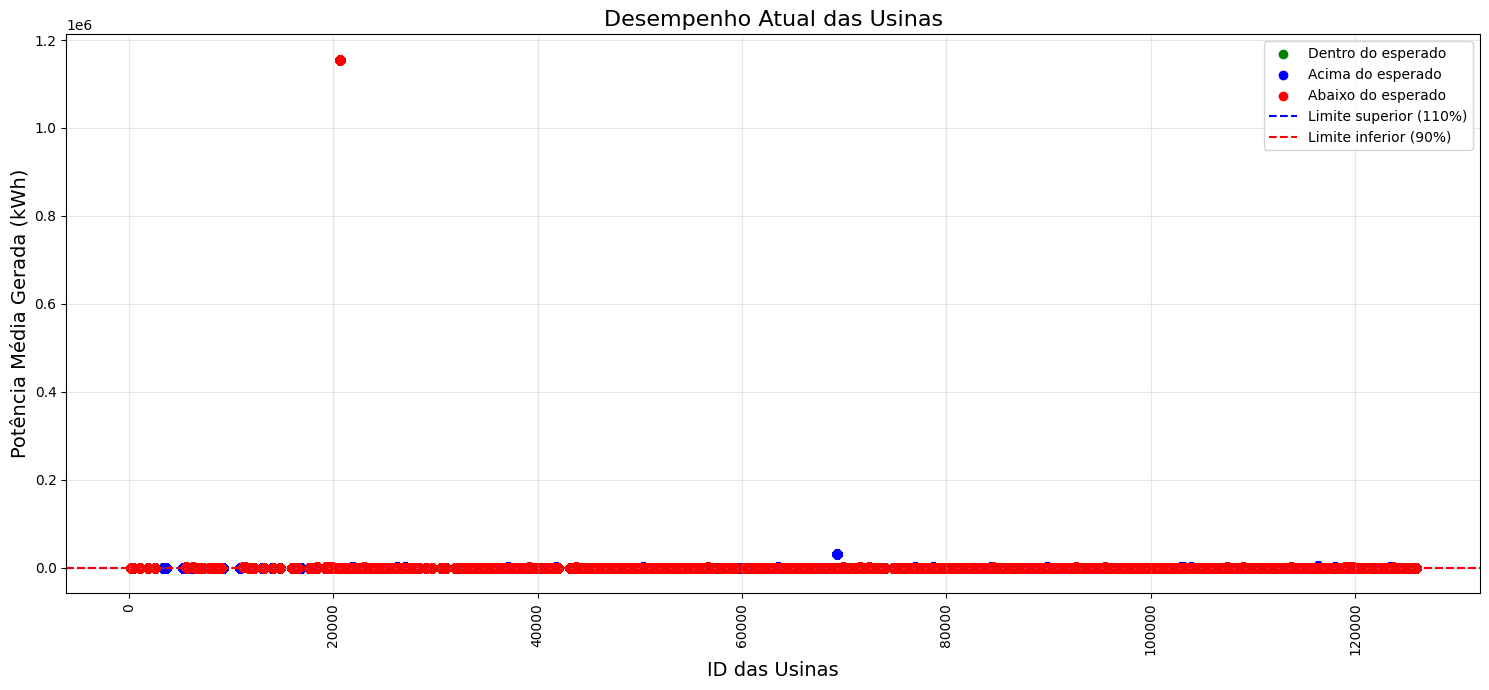

In [21]:
# Agregar a geração média por usina
geracao_agg = (
    df.groupby("id")
    .agg({"quantidade": "mean", "prognostico": "mean"})
    .reset_index()
    .rename(columns={"quantidade": "geracao_media", "prognostico": "prognostico_medio"})
)

# Mesclar com as informações de potência e localização
dados = pd.merge(df, geracao_agg, left_on="id", right_on="id")

# Calcular o desempenho relativo em relação ao prognóstico
dados["desempenho_relativo"] = dados["geracao_media"] / dados["prognostico_medio"]

# Comparar o desempenho relativo com a média da cidade
# Primeiro, agregar o desempenho médio por cidade
desempenho_por_cidade = (
    dados.groupby("id_cidade")
    .agg({"desempenho_relativo": "mean"})
    .reset_index()
    .rename(columns={"desempenho_relativo": "desempenho_medio_cidade"})
)

# Mesclar o desempenho médio da cidade com os dados das usinas
dados = pd.merge(dados, desempenho_por_cidade, on="id_cidade")

# Calcular a diferença em relação ao desempenho médio da cidade
dados["diferenca_relativa"] = dados["desempenho_relativo"] / dados["desempenho_medio_cidade"]

# Classificar o desempenho com base na diferença relativa
def classificar_desempenho_com_localizacao(valor):
    if valor >= 0.9 and valor <= 1.1:
        return "Dentro do esperado"
    elif valor < 0.9:
        return "Abaixo do esperado"
    else:
        return "Acima do esperado"

dados["classificacao"] = dados["diferenca_relativa"].apply(classificar_desempenho_com_localizacao)

# Exibir as usinas fora do desempenho esperado
usinas_problema = dados[dados["classificacao"] != "Dentro do esperado"]
display(usinas_problema)

# Dados fictícios para demonstração
usinas_problema = dados[dados["classificacao"] != "Dentro do esperado"]

# Separar dados por classificação
usinas_acima = usinas_problema[usinas_problema["classificacao"] == "Acima do esperado"]
usinas_abaixo = usinas_problema[usinas_problema["classificacao"] == "Abaixo do esperado"]
usinas_dentro = dados[dados["classificacao"] == "Dentro do esperado"]

# Configurar o gráfico
plt.figure(figsize=(15, 7))

usinas_dentro = usinas_dentro[usinas_dentro["geracao_media"] < 0]

# Plotar potência das usinas dentro do esperado
plt.scatter(
    usinas_dentro["id"], 
    usinas_dentro["geracao_media"], 
    color="green", 
    label="Dentro do esperado"
)

# Plotar potência das usinas acima do esperado
plt.scatter(
    usinas_acima["id"], 
    usinas_acima["geracao_media"], 
    color="blue", 
    label="Acima do esperado"
)

# Plotar potência das usinas abaixo do esperado
plt.scatter(
    usinas_abaixo["id"], 
    usinas_abaixo["geracao_media"], 
    color="red", 
    label="Abaixo do esperado"
)

# Adicionar linhas para identificar a classificação
y_min, y_max = plt.ylim()  # Obter limites do eixo Y
plt.axhline(y=1.1, color="blue", linestyle="--", label="Limite superior (110%)")
plt.axhline(y=0.9, color="red", linestyle="--", label="Limite inferior (90%)")

# Personalizar o gráfico
plt.title("Desempenho Atual das Usinas", fontsize=16)
plt.xlabel("ID das Usinas", fontsize=14)
plt.ylabel("Potência Média Gerada (kWh)", fontsize=14)
plt.xticks(rotation=90)
plt.legend()
plt.grid(alpha=0.3)

# Mostrar o gráfico
plt.tight_layout()
plt.show()